<div style="text-align:right;">Regression by using Keras</div>
<div style="text-align:right;">Brickea with material from mofan python</div>

# Regressor 回归问题

## Generate data

In [57]:
import numpy as np
from matplotlib import pyplot as plt

In [58]:
# Make sure result is same for every time
np.random.seed(120)

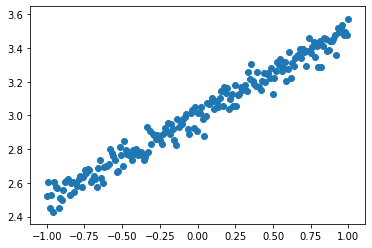

In [59]:
X = np.linspace(-1,1,200)

# Randomlize the data
np.random.shuffle(X)
y = 0.5 * X + 3 + np.random.normal(loc=0,scale=0.05,size=(200,))
# Plot the data
plt.scatter(X,y)

## Divide data into training data and test data

In [60]:
train_X ,train_y = (X[:160],y[:160])
test_X, test_y = (X[160:],y[160:])

## Create Model
models.Sequential，用来一层一层一层的去建立神经层； layers.Dense 意思是这个神经层是全连接层。

In [61]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

然后用 Sequential 建立 model， 再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的。

如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。在这个例子里，只需要一层就够了。

In [62]:
regression_model = Sequential()
regression_model.add(Dense(input_dim=1,output_dim=1))

/Users/brickeawang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


## Activate Model

接下来要激活神经网络，上一步只是定义模型。

参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法。

In [63]:
# Choose optimizer and loss function
regression_model.compile(loss="mse",optimizer="sgd")

## Train Model

In [69]:
train_times = 300
print("Training------------------")
for i in range(train_times):
    cost = regression_model.train_on_batch(train_X,train_y)
    if i % 50 == 0:
        print("current:%s %f"% (i+1,grade))

Training------------------
current:1 0.002450
current:51 0.002450
current:101 0.002450
current:151 0.002450
current:201 0.002450
current:251 0.002450


## Test Model

用到的函数是 model.evaluate，输入测试集的x和y， 

输出 cost，weights 和 biases。

其中 weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。

从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 3。

In [70]:
print("Test--------------")
cost = regression_model.evaluate(test_X,test_y)
print("test cost %f" %(cost))
W,b = regression_model.layers[0].get_weights()
print("weights:%f  bias:%f"%(W,b))

Test--------------
40/40 [==============================] - 0s 44us/step
test cost 0.002952
weights:0.491597  bias:3.002305


## Visualize the result

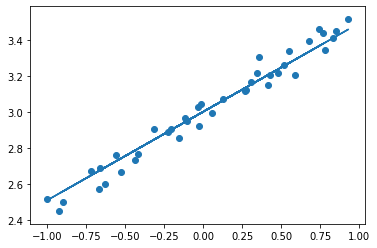

In [73]:
pre_y = regression_model.predict(test_X)
plt.scatter(test_X,test_y)
plt.plot(test_X,pre_y)